# Uniform distribution of points  in a 1Gpc cube


In this Python notebook you will find

1 . A generated distribution of quasars using a uniform distribution

    1.1 A grid conformed by positions every 20 Mpc/h in x,y,z     
    1.2 Output of a Flux(x,y,z) in the grid with periodic conditions



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.random.seed(1234) #To get always the same random points

# 1. Positions of QSOs using a Uniform Distribution 


In [2]:
Nsize = 10000 #Number of Quasars
size_array = ( Nsize,)
box_size = 1.0 #Represents a cube of 100 Mpc/h x 100 Mpc/h x 100 Mpc/h

In [3]:
# from 0 to 1 Gpc
cube = np.random.uniform(0.0, box_size, size = size_array) 
cube = np.array(cube,dtype = {'names': ('cx', 'cy', 'cz'),'formats': ('f8', 'f8', 'f8')} )
cube['cy'] = np.random.uniform(0.0, box_size, size=size_array)
cube['cz'] = np.random.uniform(0.0, box_size, size=size_array)
cube

array([(0.1915194503788923, 0.7166881698628262, 0.5542693865183056),
       (0.6221087710398319, 0.5741470442958853, 0.1809782379192011),
       (0.4377277390071145, 0.6704131494399272, 0.37612515633291255), ...,
       (0.1465507802420497, 0.9848278931708329, 0.12055533702696508),
       (0.7056196693420219, 0.9892668859932857, 0.33285588338642014),
       (0.8408635109018199, 0.8115507743851926, 0.6205747710498253)], 
      dtype=[('cx', '<f8'), ('cy', '<f8'), ('cz', '<f8')])

In [4]:
#cube['cx']
#cube['cy']
#cube['cz']

In [5]:
#visualize a slice 
slice_cube = (cube['cx']>0.49) * (cube['cx']<0.50)

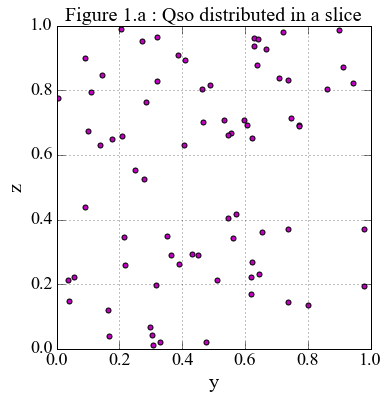

In [6]:
plt.figure(figsize=(5.5,5.5))
plt.plot(cube['cy'][slice_cube], cube['cz'][slice_cube], ls = 'None', ms = 5, marker = 'o', color='m')
plt.xlabel('y')
plt.ylabel('z')
plt.tight_layout()
plt.savefig("quasar_distribution.pdf")
plt.title('Figure 1.a : Qso distributed in a slice')
plt.grid()


In [7]:
cube['cy'][slice_cube]

array([ 0.60545966,  0.62764532,  0.45043843,  0.48775708,  0.30739684,
        0.11057452,  0.86154074,  0.0889897 ,  0.27950303,  0.24930556,
        0.46578514,  0.1451157 ,  0.16646267,  0.73629444,  0.62214775,
        0.36536699,  0.20622164,  0.21441885,  0.38705469,  0.55629829,
        0.09971968,  0.46281788,  0.39038802,  0.31842084,  0.00347538,
        0.91241808,  0.90012234,  0.35270488,  0.73655738,  0.21900505,
        0.7464876 ,  0.29612236,  0.56180083,  0.47441232,  0.27231301,
        0.73725226,  0.32083228,  0.32891444,  0.63719903,  0.62972463,
        0.80223498,  0.64356262,  0.30217267,  0.0547939 ,  0.57211138,
        0.70795379,  0.65381146,  0.03494283,  0.62391986,  0.31734529,
        0.94453343,  0.13955732,  0.5120375 ,  0.77119717,  0.4081154 ,
        0.0907911 ,  0.66662996,  0.77118847,  0.9790497 ,  0.7200116 ,
        0.64127745,  0.2067889 ,  0.03859074,  0.61848958,  0.61993167,
        0.28381727,  0.97826727,  0.54659381,  0.59778221,  0.54

(array([ 1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,
         1.,  1.,  0.,  2.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  1.,
         0.,  1.,  2.,  1.,  1.,  1.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,
         2.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,
         1.,  0.,  1.,  2.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  5.,  2.,
         2.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  3.,  1.,  0.,
         2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([ 0.00347538,  0.01323112,  0.02298687,  0.03274261,  0.04249835,
         0.0522541 ,  0.06200984,  0.07176558,  0.08152133,  0.09127707,
         0.10103281,  0.11078856,  0.1205443 ,  0.13030004,  0.14005579,
         0.14981153,  0.15956727,  0.16932301,  0.17907876,  0.1888345 ,
         0.19859024,  0.20834599,  0.21810173,  0.22785747,  0.23761322,
         0.24736896,  0.2571247 ,  0.26688045,  0.27663619,  0.286391

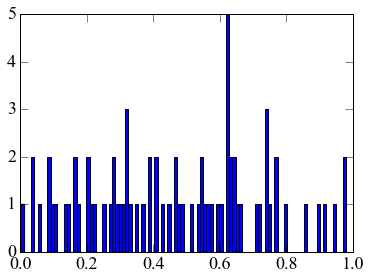

In [8]:
#Just a histogram of the number of y points in a slice 
plt.hist(cube['cy'][slice_cube],bins=100)

## 1.1 Grid to calculate the distance every 20 Mpc

In [9]:
#Grid
xx = np.arange(0.00,1.01,0.020)
yy = np.arange(0.00,1.01,0.020)
zz = np.arange(0.00,1.01,0.020)
print('Size of measuring grid:',xx.size*yy.size*zz.size)

Size of measuring grid: 132651


## 1.2 Calculating the photoionisation rate :  Γ(x,y,z)

In [10]:
#Some constant values
Lum = 1.0   #Test value
lamb0 = 0.3 # comoving mean free path or the absorption probability per unit length? 
coeff = Lum/(4*np.pi)
#These constant values go in the formula below
#Gamma_p1 = np.sum(coeff* np.exp(-dist/lamb0)/(dist*dist) )
#Gamma_p1

Gamma_min: 132.690271998 Gamma_max 189994.91784


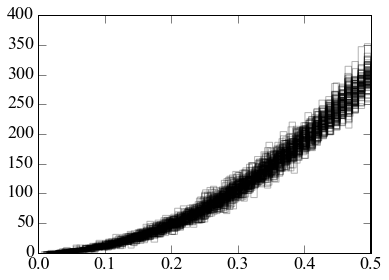

In [21]:
#Sampling the grid
gamma_a = []
mean_dist = []
ct=0
fig = plt.figure(1)
for x in xx:
    for y in yy:
        for z in zz:
            # Periodic boundary contitions for the points near the edges.
            # Make the dx, dy and dz and create mask (m_*) for periodic
            # boundary conditions. Then, replace those points further away
            # by the their periodic analogue.
            dx, dy, dz = cube['cx']-x, cube['cy']-y,cube['cz']-z
            m_x = np.abs(dx) > 0.5 * box_size
            dx[m_x] = box_size - np.abs(dx[m_x])
            
            # Same for y
            m_y = np.abs(dy) > 0.5 * box_size
            dy[m_y] = box_size - np.abs(dy[m_y])
            
            #Same for z
            m_z = np.abs(dz) > 0.5 * box_size
            dz[m_z] = box_size - np.abs(dz[m_z])
            #### end of the periodic boundary conditions
            
            # the distance array
            dist = np.sqrt((dx)**2 +(dy)**2 +(dz)**2)
            dist_mask = dist <= np.abs(0.5)
            dist = dist[dist_mask]
            #print(dist)
            if ct%1000==0:
                a = plt.hist(dist,bins=50,histtype='step',color='k',alpha=0.3) #I put this line to double check distances are working with the p.c. 
            ct +=1
            #plt.show()
            #Calculating the phothoionisation rate
            Gamma = np.sum(coeff* np.exp(-dist/lamb0)/(dist**2) )
            # Print stats for each point as sanity checks.
            #print("{:.3f} {:.3f} {:.2f} {:5.2e} {:5.2f} {:5.2f}".format(dist.mean(),dist.std(),dist.max(),
            #dist.min(),np.log10(Gamma.max()),np.log10(Gamma.min())))
            gamma_a.append(Gamma)
            mean_dist.append(dist.mean())
#plt.hist(dist,bins=1000) #I put this line to double check distances are working with the p.c.
gamma_a = np.array(gamma_a)

print("Gamma_min:",gamma_a.min(),'Gamma_max',gamma_a.max())

This image is plotting a histogram every 1000 points

In [12]:
#This test is juts to show that the sun of two uniform distributions are gaussian
#test = np.sqrt(np.random.uniform(0,1,10000)**2 + np.random.uniform(0,1,10000)**2)
#plt.hist(test,bins=100)

In [13]:
#Values relative to the mean flux
print(gamma_a/gamma_a.mean())

[ 0.93084722  1.17949441  1.03867289 ...,  1.09783023  0.93312163
  0.93084722]


This plot shows $\Gamma(x,y,z)$ for a uniform distribution of points. $\Gamma$ should be sort of constant since one would expect that each point on the grid receives approximately the same ionising radiation contribution.

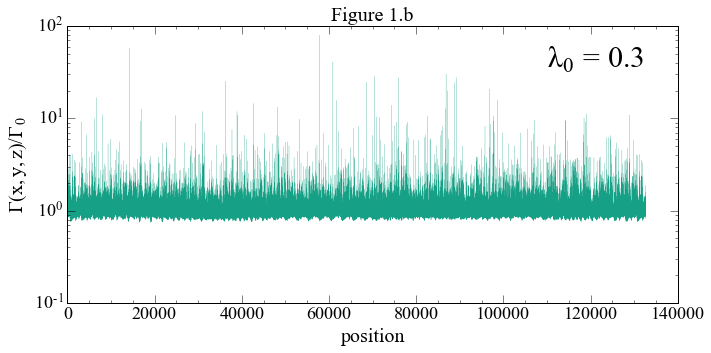

In [14]:
fig = plt.figure(1,figsize = (10,5))
plt.minorticks_on()

plt.plot(np.arange(gamma_a.size),gamma_a/gamma_a.mean(), linewidth=0.15, color='#16a085')
plt.yscale('log')
plt.ylabel('$\Gamma(x,y,z)/\Gamma_0$')
plt.xlabel('position')
plt.title('Figure 1.b')
plt.tight_layout()
plt.text(110000, 35, '$\lambda_0$ = 0.3', fontsize =30)
#plt.savefig('gammavspos.pdf')
#This plot is the Gamma calculations at each point of the grid (the grid has 27 points).

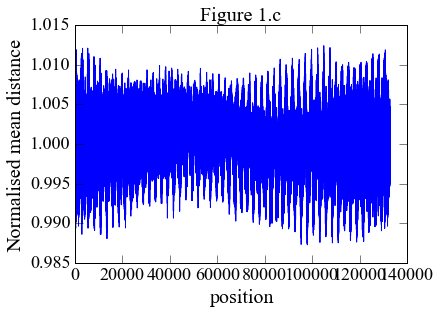

In [15]:
#Some fluctuations due to the distance module and also affected by the periodic conditions
#plt.plot(mean_dist/np.mean(np.array(mean_dist)))
plt.plot(mean_dist/np.mean(np.array(mean_dist)))
plt.ylabel('Normalised mean distance')
plt.xlabel('position')
plt.title('Figure 1.c')

## Plotting $\lambda_0$ = 100 Mpc 

In [16]:
lamb0 = 0.1 #100 Mpc

gamma_a = []
mean_dist = []
ct=0
fig = plt.figure(1)
for x in xx:
    for y in yy:
        for z in zz:
            # Periodic boundary contitions for the points near the edges.
            # Make the dx, dy and dz and create mask (m_*) for periodic
            # boundary conditions. Then, replace those points further away
            # by the their periodic analogue.
            dx, dy, dz = cube['cx']-x, cube['cy']-y,cube['cz']-z
            m_x = np.abs(dx) > 0.5 * box_size
            dx[m_x] = box_size - np.abs(dx[m_x])
            
            # Same for y
            m_y = np.abs(dy) > 0.5 * box_size
            dy[m_y] = box_size - np.abs(dy[m_y])
            
            #Same for z
            m_z = np.abs(dz) > 0.5 * box_size
            dz[m_z] = box_size - np.abs(dz[m_z])
            #### end of the periodic boundary conditions
            
            # the distance array
            dist = np.sqrt((dx)**2 +(dy)**2 +(dz)**2)
            dist_mask = dist <= np.abs(0.5)
            dist = dist[dist_mask]
            
            #Calculating the phothoionisation rate
            Gamma = np.sum(coeff* np.exp(-dist/lamb0)/(dist**2) )
            gamma_a.append(Gamma)
            mean_dist.append(dist.mean())
gamma_a = np.array(gamma_a)



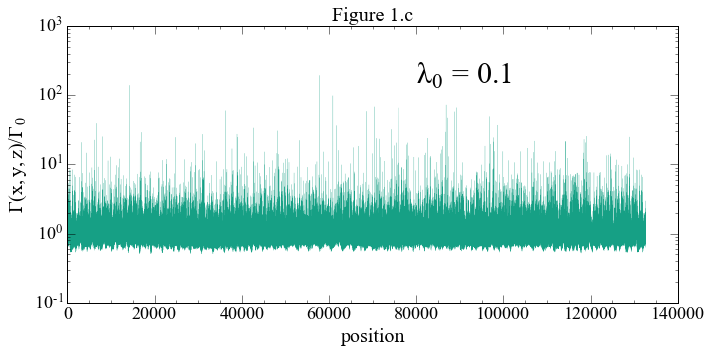

In [17]:
fig = plt.figure(1,figsize = (10,5))
plt.minorticks_on()

plt.plot(np.arange(gamma_a.size),gamma_a/gamma_a.mean(), linewidth=0.15, color='#16a085')
plt.yscale('log')
plt.ylabel('$\Gamma(x,y,z)/\Gamma_0$')
plt.xlabel('position')
plt.title('Figure 1.c')
plt.tight_layout()
plt.text(80000, 145, '$\lambda_0$ = 0.1', fontsize =30)

## Plotting $\lambda_0$ = 50 Mpc 

In [18]:
lamb0 = 0.05 # 50 Mpc

gamma_a = []
mean_dist = []
ct=0
fig = plt.figure(1)
for x in xx:
    for y in yy:
        for z in zz:
            # Periodic boundary contitions for the points near the edges.
            # Make the dx, dy and dz and create mask (m_*) for periodic
            # boundary conditions. Then, replace those points further away
            # by the their periodic analogue.
            dx, dy, dz = cube['cx']-x, cube['cy']-y,cube['cz']-z
            m_x = np.abs(dx) > 0.5 * box_size
            dx[m_x] = box_size - np.abs(dx[m_x])
            
            # Same for y
            m_y = np.abs(dy) > 0.5 * box_size
            dy[m_y] = box_size - np.abs(dy[m_y])
            
            #Same for z
            m_z = np.abs(dz) > 0.5 * box_size
            dz[m_z] = box_size - np.abs(dz[m_z])
            #### end of the periodic boundary conditions
            
            # the distance array
            dist = np.sqrt((dx)**2 +(dy)**2 +(dz)**2)
            dist_mask = np.abs(dist) <= 0.5
            dist = dist[dist_mask]
            
            #Calculating the phothoionisation rate
            Gamma = np.sum(coeff* np.exp(-dist/lamb0)/(dist**2) )
            gamma_a.append(Gamma)
            mean_dist.append(dist.mean())
gamma_a = np.array(gamma_a)


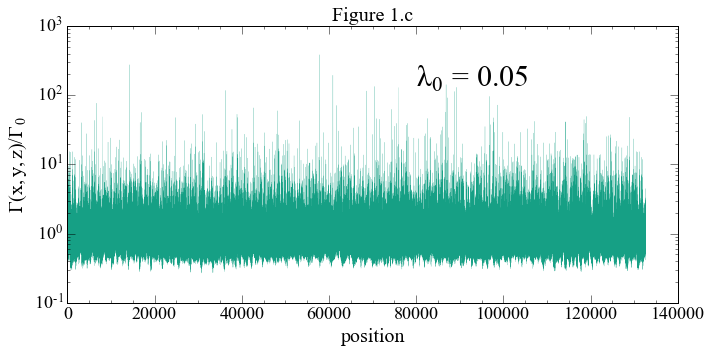

In [19]:
fig = plt.figure(1,figsize = (10,5))
plt.minorticks_on()

plt.plot(np.arange(gamma_a.size),gamma_a/gamma_a.mean(), linewidth=0.15, color='#16a085')
plt.yscale('log')
plt.ylabel('$\Gamma(x,y,z)/\Gamma_0$')
plt.xlabel('position')
plt.title('Figure 1.c')
plt.tight_layout()
plt.text(80000, 135, '$\lambda_0$ = 0.05', fontsize =30)